In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import data_manager as dm

sns.set(style="darkgrid", font_scale=1.4)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = dm.load_dataframe("sigma_extraction_contest.csv")

In [3]:
df.head()

,method_name,phantom_porosity,phantom_sigma,calculated_sigma,deviation_percent,processing_time_seconds
0,grimax,0.1,10,11.313708,13.137085,0.036654
1,grimax_gaus,0.1,10,11.313708,13.137085,0.294827
2,grimax,0.1,20,18.384776,8.076118,0.019926
3,grimax_gaus,0.1,20,26.870058,34.350288,0.230845
4,grimax,0.1,30,32.526912,8.423040,0.013619


In [5]:
# df.loc[df.method_name=="anvar", "calculated_sigma"] = df[df.method_name=="anvar"].calculated_sigma / 1.6
# df.head()

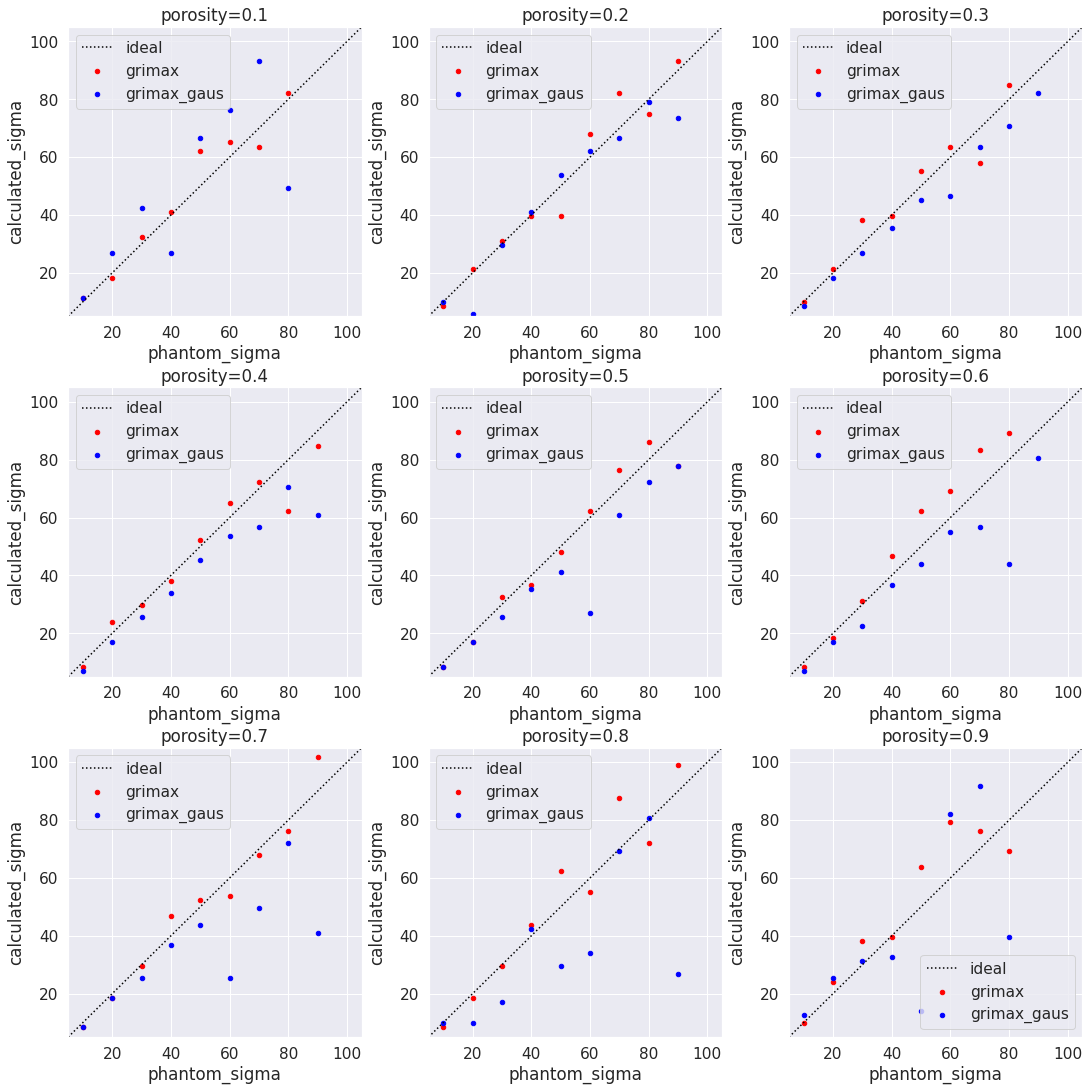

In [5]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["grimax", "grimax_gaus"], ["red", "blue"]):
        #polyfit
        equation = ""
        if method == "anvar":
            x = df_p.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
            y = df_p.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
            fit = np.polyfit(x, y, 1)
            x_new = np.linspace(10, 35)
            ax.plot(x_new, x_new*fit[0]+fit[1], color='blue', linestyle="dotted")
            equation = f"{fit[1]:.2f}+{fit[0]:.2f}x"

        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="calculated_sigma",
                                                           ax=ax,
                                                           label=method+equation,
                                                           color=c)
        ax.set_title(f"porosity={p}")
        ax.set_ylim(5, 105)
        ax.set_xlim(5, 105)
    
    x = np.linspace(5, 105)
    ax.plot(x, x, color='black', linestyle="dotted", label="ideal")
    ax.legend()


# Precision

In [6]:
df.groupby("method_name").get_group("grimax_gaus").deviation_percent.mean()

21.695422399107553

In [7]:
df.groupby("method_name").get_group("grimax").deviation_percent.mean()

12.149336077690046

In [9]:
method = "grimax"
x = df.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
y = df.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
((x - y)**2).mean(axis=0)


101.9306913354865

In [10]:
method = "grimax_gaus"
x = df.groupby("method_name").get_group(method).phantom_sigma.to_numpy()
y = df.groupby("method_name").get_group(method).calculated_sigma.to_numpy()
((x - y)**2).mean(axis=0)

278.20001420742216

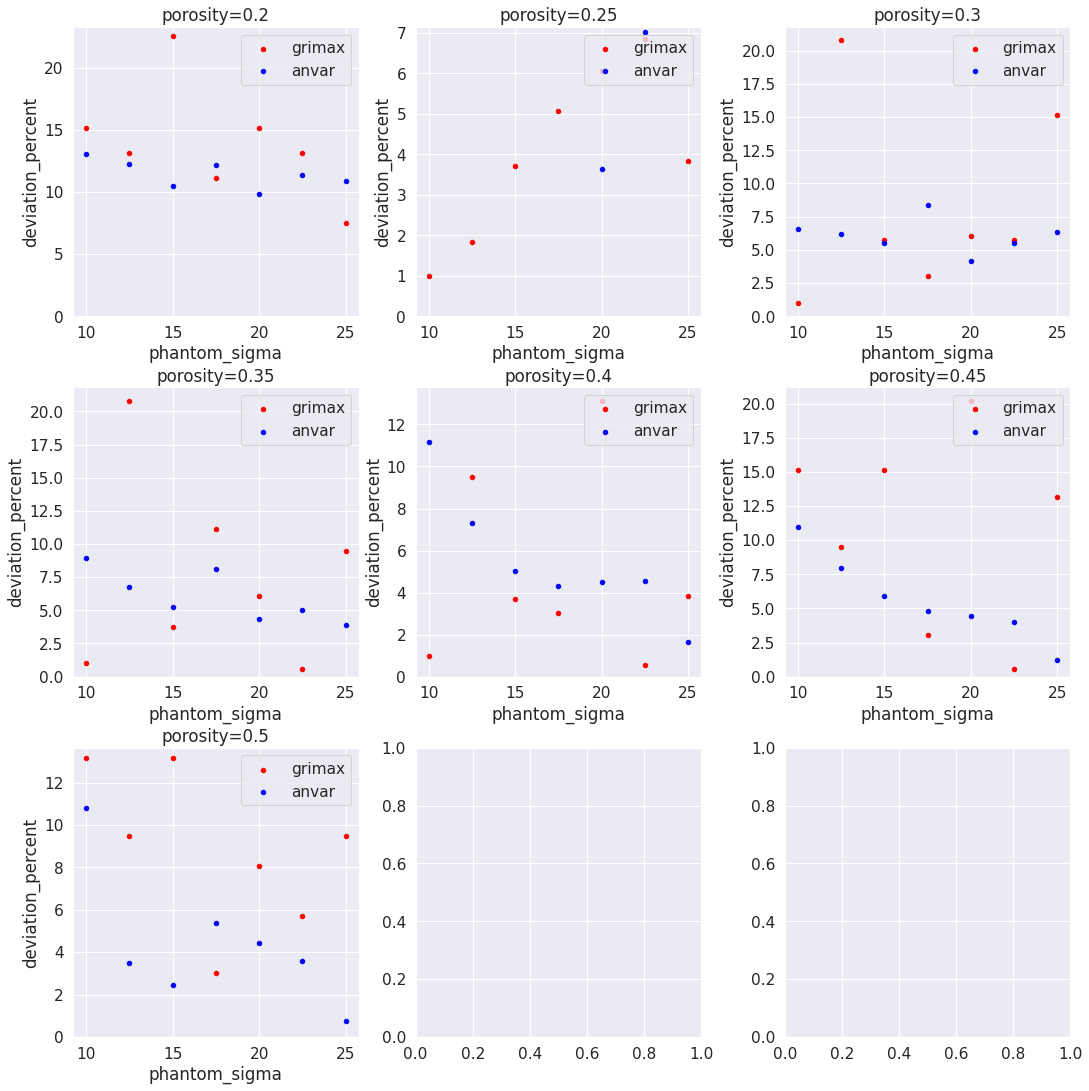

In [11]:
porosities = df.phantom_porosity.unique()

ncols = 3
nrows = len(porosities)//ncols + len(porosities)%ncols
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()

for p, ax in zip(porosities, axes):
    df_p = df.groupby("phantom_porosity").get_group(p)
    for method, c in zip(["grimax", "anvar"], ["red", "blue"]):
        #polyfit
        df_p.groupby("method_name").get_group(method).plot(kind="scatter",
                                                           x="phantom_sigma",
                                                           y="deviation_percent",
                                                           ax=ax,
                                                           label=method,
                                                           color=c)
        ax.set_title(f"porosity={p}")
        ax.set_ylim(ymin=0)

    ax.legend(loc=1)
